In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
train = pd.read_csv("https://raw.githubusercontent.com/emanuelvs/university-activities/main/train.csv",index_col=[0])
test = pd.read_csv("https://raw.githubusercontent.com/emanuelvs/university-activities/main/test.csv",index_col=[0])

#Redução do dataset para 20.000 instâncias por limitação no poder computacional para o treinamento da MLP
train = train[0:15000]
test = test[0:5000]


Normalização

In [ ]:
#Customer Type
normalized_train = train.replace(to_replace="Loyal Customer", value= 0)
normalized_train = normalized_train.replace(to_replace="disloyal Customer", value= 1)

#Type of Travel
normalized_train = normalized_train.replace(to_replace="Personal Travel", value= 0)
normalized_train = normalized_train.replace(to_replace="Business travel", value= 1)

#Class
normalized_train = normalized_train.replace(to_replace="Business", value= 0)
normalized_train = normalized_train.replace(to_replace="Eco", value= 1)
normalized_train = normalized_train.replace(to_replace="Eco Plus", value= 2)

#Gender
normalized_train = normalized_train.replace(to_replace="Male", value= 0)
normalized_train = normalized_train.replace(to_replace="Female", value= 1)

train = normalized_train


In [ ]:
#Customer Type
normalized_test = test.replace(to_replace="Loyal Customer", value= 0)
normalized_test = normalized_test.replace(to_replace="disloyal Customer", value= 1)

#Type of Travel
normalized_test = normalized_test.replace(to_replace="Personal Travel", value= 0)
normalized_test = normalized_test.replace(to_replace="Business travel", value= 1)

#Class
normalized_test = normalized_test.replace(to_replace="Business", value= 0)
normalized_test = normalized_test.replace(to_replace="Eco", value= 1)
normalized_test = normalized_test.replace(to_replace="Eco Plus", value= 2)

#Gender
normalized_test = normalized_test.replace(to_replace="Male", value= 0)
normalized_test = normalized_test.replace(to_replace="Female", value= 1)

test = normalized_test

In [6]:
train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,0,0,13,0,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,0,1,25,1,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,1,0,26,1,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,1,0,25,1,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,0,0,61,1,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,110561,0,1,22,1,1,488,3,5,3,...,2,3,2,4,3,4,2,70,53.0,neutral or dissatisfied
14996,117023,0,1,20,1,1,304,2,2,2,...,5,3,5,3,1,4,5,0,2.0,neutral or dissatisfied
14997,107605,1,0,45,1,0,2708,5,5,5,...,3,3,3,3,3,3,5,7,0.0,satisfied
14998,22344,0,1,33,1,1,143,2,0,2,...,4,3,3,4,5,1,4,0,0.0,neutral or dissatisfied


Drop com exceção de Gender, Customer Type, Type of Travel e Class

In [7]:
train.drop(["id", "Age","Departure Delay in Minutes", "Arrival Delay in Minutes", "Flight Distance"], axis=1, inplace=True)
train = train.dropna()

In [8]:
test.drop(["id", "Age", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Flight Distance"], axis=1, inplace=True)
test = test.dropna()

In [9]:
train

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0,0,0,2,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,0,1,1,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,1,0,1,0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,1,0,1,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,0,0,1,0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,1,1,1,3,5,3,3,2,3,2,2,3,2,4,3,4,2,neutral or dissatisfied
14996,0,1,1,1,2,2,2,4,5,2,5,5,3,5,3,1,4,5,neutral or dissatisfied
14997,1,0,1,0,5,5,5,5,2,5,4,3,3,3,3,3,3,5,satisfied
14998,0,1,1,1,2,0,2,5,4,2,3,4,3,3,4,5,1,4,neutral or dissatisfied


In [10]:
y_train = train["satisfaction"]
x_train = train.drop("satisfaction", axis = 1)

In [11]:
y_train = y_train.replace(to_replace="satisfied", value= 1)
y_train = y_train.replace(to_replace="neutral or dissatisfied", value= 0)

y_train

C:\Users\felip\AppData\Local\Temp\ipykernel_12272\2700020917.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(to_replace="neutral or dissatisfied", value= 0)


0        0
1        0
2        1
3        0
4        1
        ..
14995    0
14996    0
14997    1
14998    0
14999    0
Name: satisfaction, Length: 15000, dtype: int64

In [12]:
y_test = test["satisfaction"]
x_test = test.drop("satisfaction", axis = 1)

In [13]:
y_test = y_test.replace(to_replace="satisfied", value= 1)
y_test = y_test.replace(to_replace="neutral or dissatisfied", value= 0)

y_test

C:\Users\felip\AppData\Local\Temp\ipykernel_12272\1071947495.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(to_replace="neutral or dissatisfied", value= 0)


0       1
1       1
2       0
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    0
4999    1
Name: satisfaction, Length: 5000, dtype: int64

In [14]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [15]:
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [16]:
x_train.shape

(15000, 18)

In [17]:
x_train

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.0,0.0,0.0,2.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0
1,0.0,1.0,1.0,0.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0
2,1.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0
3,1.0,0.0,1.0,0.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0
4,0.0,0.0,1.0,0.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,1.0,1.0,1.0,3.0,5.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0
14996,0.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,5.0,2.0,5.0,5.0,3.0,5.0,3.0,1.0,4.0,5.0
14997,1.0,0.0,1.0,0.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0
14998,0.0,1.0,1.0,1.0,2.0,0.0,2.0,5.0,4.0,2.0,3.0,4.0,3.0,3.0,4.0,5.0,1.0,4.0


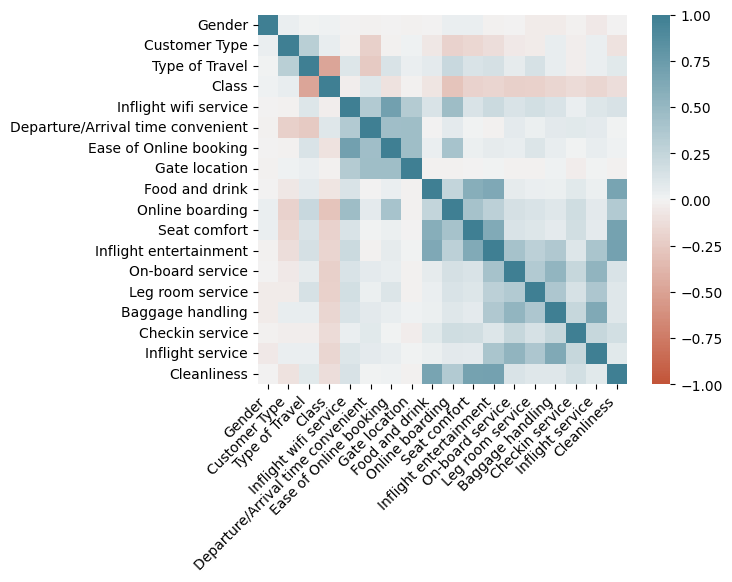

In [18]:
corr = x_train.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<Axes: >

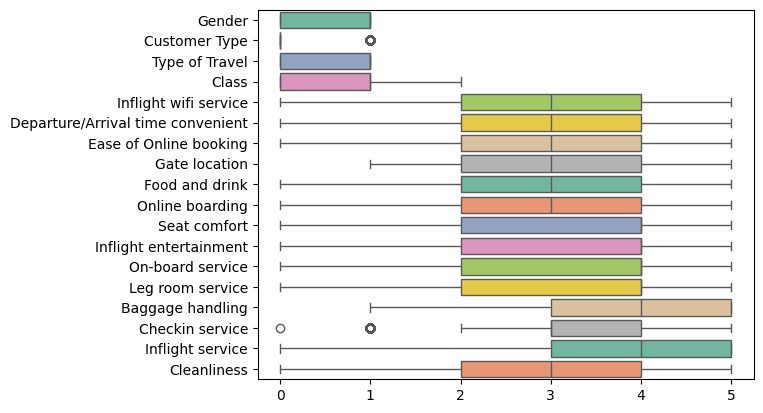

In [19]:
sns.boxplot(data=x_train, orient="h", palette="Set2")

<Axes: ylabel='Frequency'>

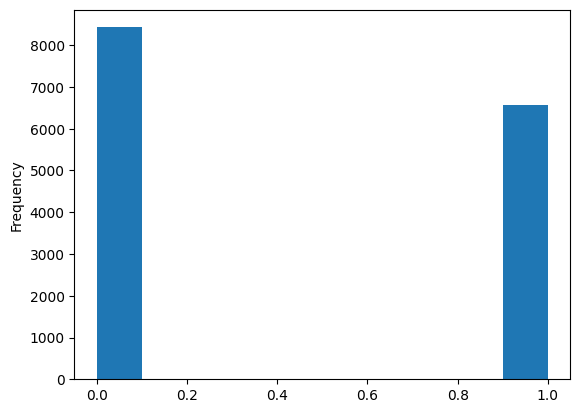

In [20]:
y_train.plot.hist(rwidth=1)

In [21]:
y_train.shape

(15000,)

Melhor modelo

In [22]:
model1 = keras.models.Sequential([
  keras.Input(shape= [18]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(1, activation="sigmoid")
  ])

In [23]:
model1.compile(loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"])

In [24]:
history1 = model1.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8058 - loss: 0.4251 - val_accuracy: 0.8790 - val_loss: 0.2611
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8895 - loss: 0.2540 - val_accuracy: 0.9154 - val_loss: 0.1964
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9124 - loss: 0.2090 - val_accuracy: 0.9250 - val_loss: 0.1852
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9219 - loss: 0.1895 - val_accuracy: 0.9362 - val_loss: 0.1531
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9320 - loss: 0.1650 - val_accuracy: 0.9294 - val_loss: 0.1620
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9346 - loss: 0.1588 - val_accuracy: 0.9390 - val_loss: 0.1534
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9421 - loss: 0.1417 - val_accuracy: 0.9360 - val_loss: 0.1609
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9430 - loss: 0.1461 - val_accuracy: 0.

In [25]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │         5,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,705 (420.73 KB)

 Trainable params: 35,901 (140.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,804 (280.49 KB)

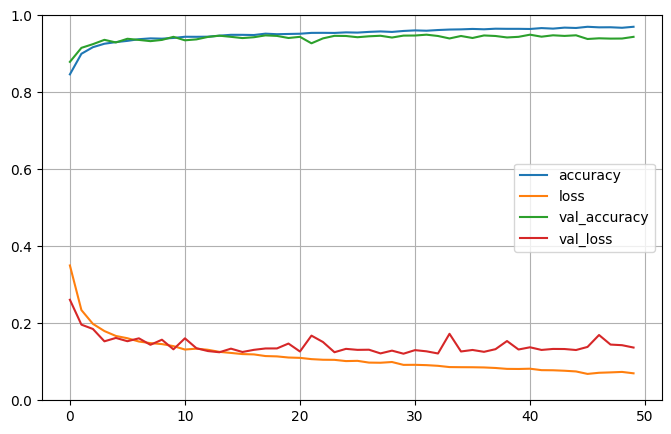

In [26]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()